In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from cartpole import CartPole
import time

In [2]:
# parameters for the cart-pole and simulation
cart_lim = np.array([-10,10]) #bounds for cart movement
pole_length = 1 
cart_mass = 1
pole_mass = 1
g = 9.81
h = 0.01
cartpole = CartPole(cart_lim, pole_length, cart_mass, pole_mass, g) #creating cartpole

<IPython.core.display.Javascript object>


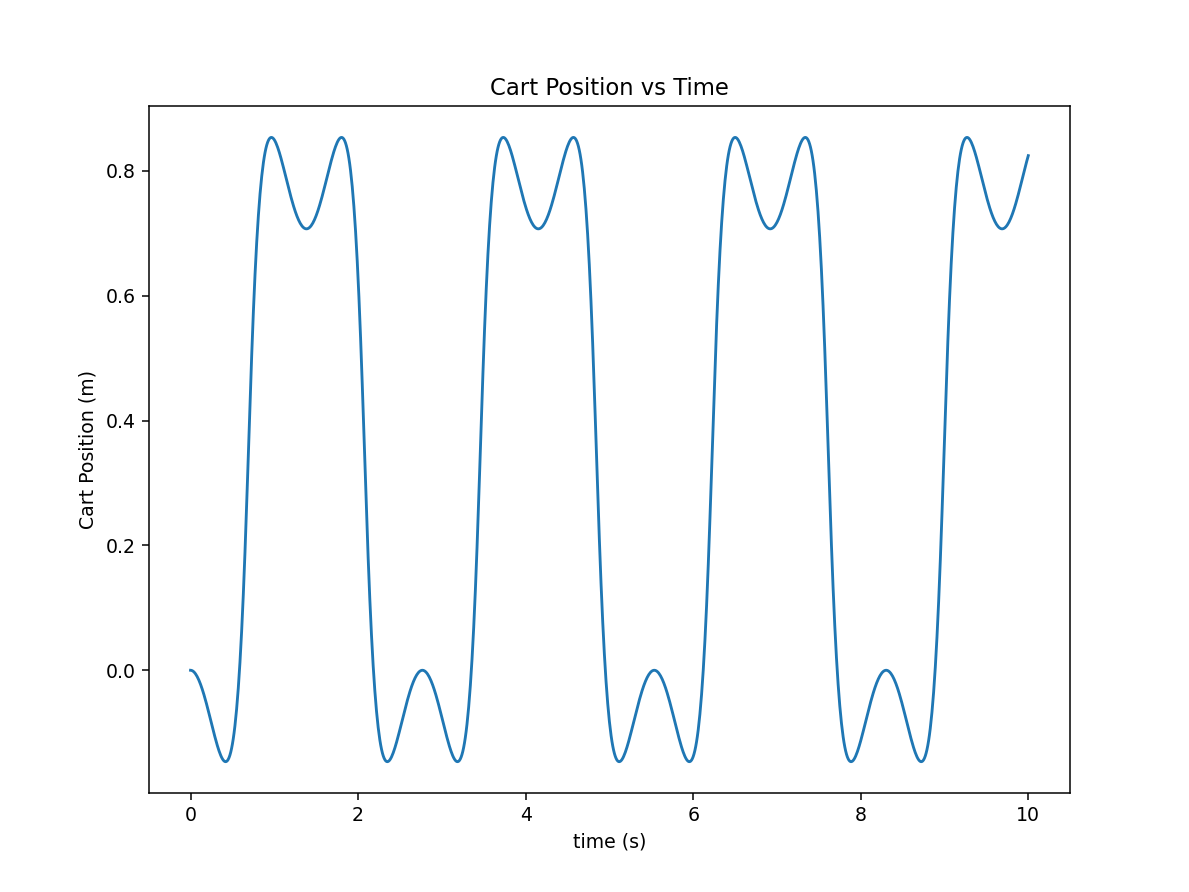

<IPython.core.display.Javascript object>


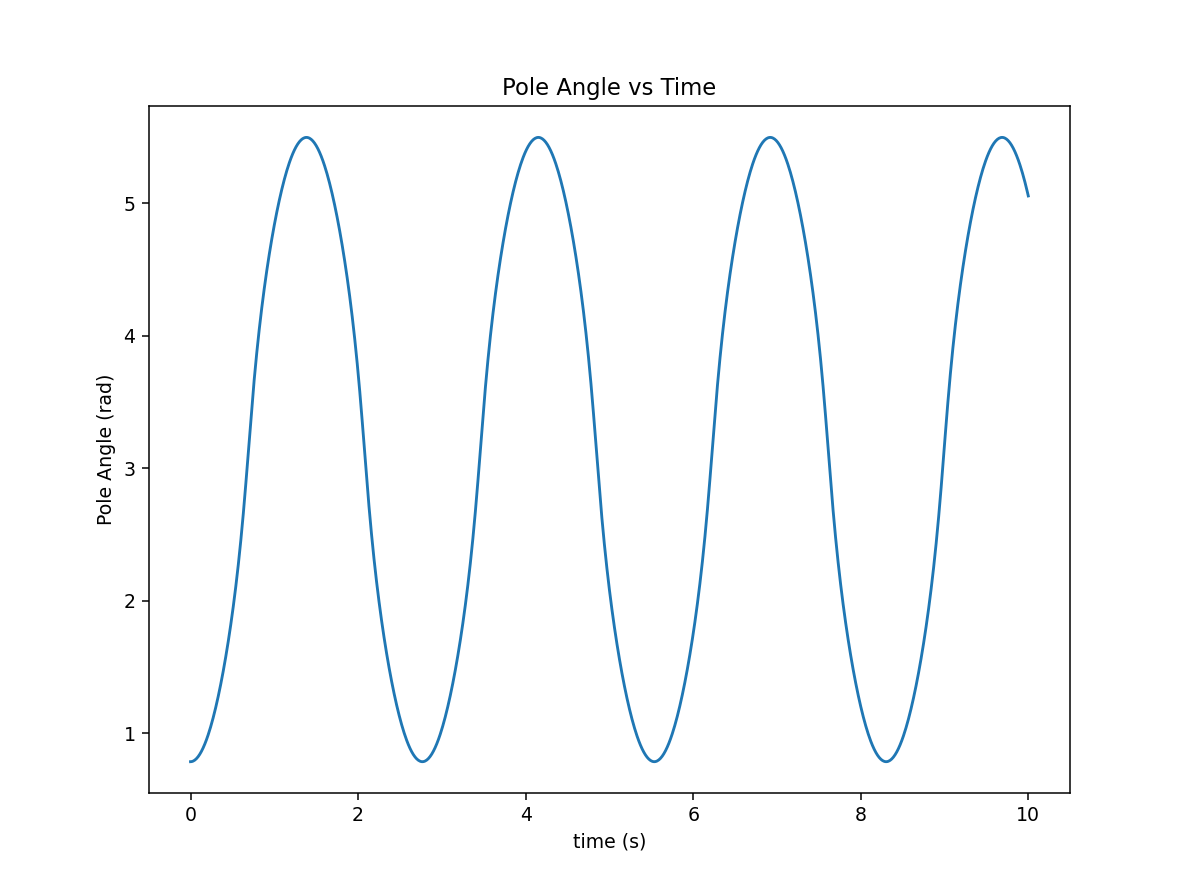

Text(0.5, 1.0, 'Pole Angle vs Time')

In [3]:
#initial position and velocity
q0 = np.array([[0,np.pi/4]]).T
dq0 = np.array([[0, 0]]).T
t_end = 10 # time till which to simulate
iters = int(t_end/h) 
history = cartpole.unforcedIntegration(q0, dq0, iters, h) #simulating unforced swinging
plt.figure()
plt.plot(history[:,0],history[:,1])
plt.xlabel("time (s)")
plt.ylabel("Cart Position (m)")
plt.title("Cart Position vs Time")
plt.figure()
plt.plot(history[:,0],history[:,2])
plt.xlabel("time (s)")
plt.ylabel("Pole Angle (rad)")
plt.title("Pole Angle vs Time")

<IPython.core.display.Javascript object>


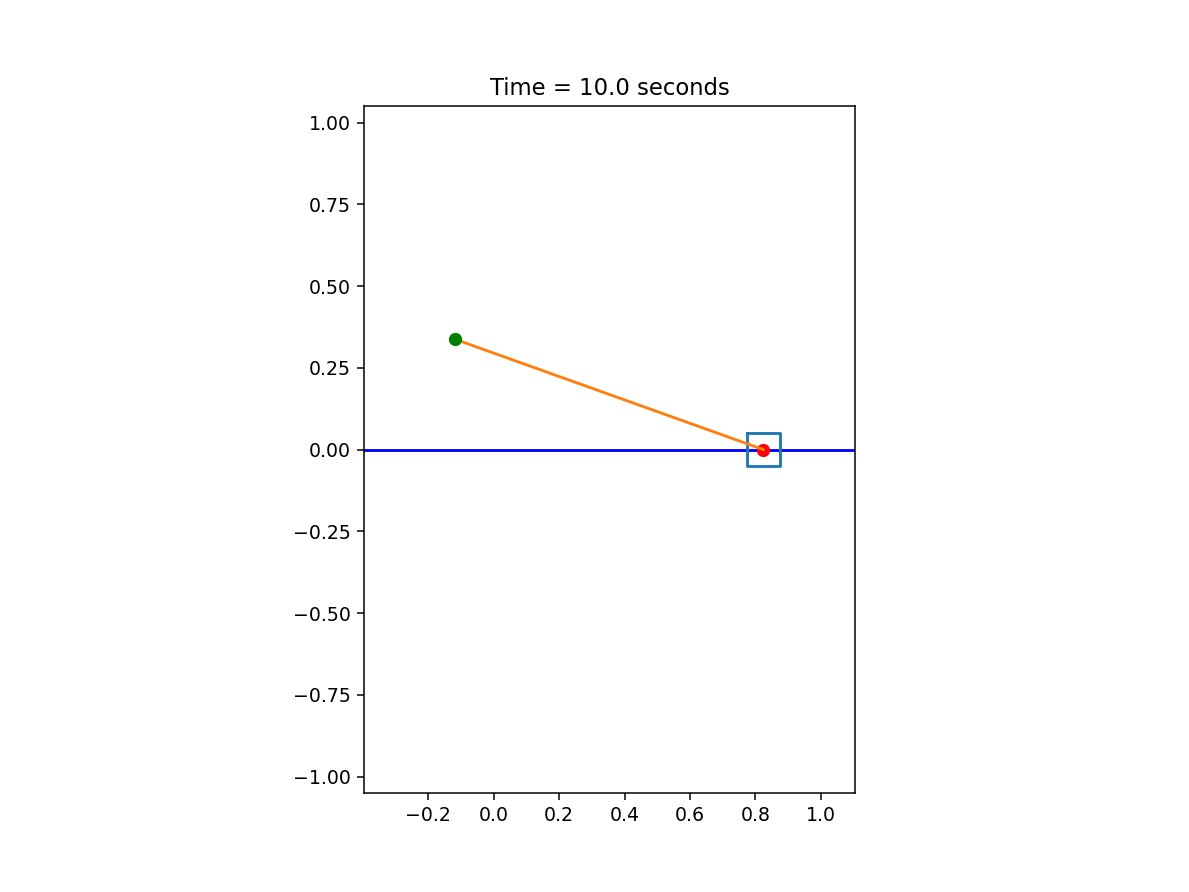

In [4]:
# animating unforced swinging
xlim = [np.min(history[:,1]+pole_length * np.sin(history[:,2]))-0.25,
        np.max(history[:,1]+pole_length * np.sin(history[:,2]))+0.25]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.gca().set_aspect('equal')
fig.show()
fig.canvas.draw()
for step in history:
    ax.clear()
    q = step[1:3].reshape((2,1))
    cartpole.drawCartPole(q,ax)
    plt.xlim(xlim)
    plt.ylim([-pole_length-0.05,pole_length+0.05])
    plt.title("Time = "+str(round(step[0],2))+" seconds")
    fig.canvas.draw()
